In [1]:
using Revise
using Pkg

ENV["PYTHON"] = Sys.which("python")
ENV["PYCALL_JL_RUNTIME_PYTHON"] = Sys.which("python")
Pkg.build("PyCall")
using FileIO
using JLD2
include("../src/RiskSensitiveSAC.jl")
using .RiskSensitiveSAC

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/51cab8e982c5b598eea9c8ceaced4b58d9dd37c9/build.log`


    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/9816a3826b0ebf49ab4926e2b18842ad8b5c8f04/build.log`


┌ Error: Unable to load the 'rospy' python package!
│ Has an environment setup script been run?
└ @ RobotOS /home/kh-ryu/.julia/packages/RobotOS/j0Tsl/src/RobotOS.jl:35


┌ Info: Number of Julia Thread(s): 1
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/RiskSensitiveSAC.jl:39
┌ Info: CUDA Device: NVIDIA GeForce RTX 3060
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/RiskSensitiveSAC.jl:40
┌ Info: Python executable used by PyCall: /home/kh-ryu/anaconda3/envs/trajectron++/bin/python
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/RiskSensitiveSAC.jl:41


# 1. Default

In [2]:
include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");

include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [3]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

Scene Mode: data
Prediction Mode: trajectron
Deterministic Prediction: false
Loaded evaluation data from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/processed/eth_test.pkl
Looking at the eth_test.pkl sequence, data_id 0, start_idx 905


Loaded Trajectron model from /home/kh-ryu/DRC_Project/DRC_Trajectron/Trajectron-plus-plus/experiments/pedestrians/models/eth_attention_radius_3/model_registrar-100.pt


In [4]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false);

┌ Warning: It's not recommended to use allowscalar([true]) to allow scalar indexing.
│ Instead, use `allowscalar() do end` or `@allowscalar` to denote exactly which operations can use scalar operations.
└ @ GPUArraysCore /home/kh-ryu/.julia/packages/GPUArraysCore/GMsgk/src/GPUArraysCore.jl:188


┌ Warning: Time 0.00 [sec]: SAC computation took 24.348 [sec], which exceeds the maximum computation time allowed.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/rs_sac_controller.jl:733


┌ Warning: Time 0.00 [sec]: This evaluation iteration took 0.115 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:300


┌ Warning: Time 0.10 [sec]: This evaluation iteration took 0.06 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:300


┌ Warning: Time 0.20 [sec]: SAC computation took 0.178 [sec], which exceeds the maximum computation time allowed.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/rs_sac_controller.jl:733
┌ Warning: Time 0.20 [sec]: This evaluation iteration took 0.179 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:300


┌ Warning: Time 0.30 [sec]: This evaluation iteration took 0.024 [sec], which exceeds dtc.
└ @ Main.RiskSensitiveSAC /home/kh-ryu/DRC_Project/DRC_Trajectron/src/evaluation.jl:300


/home/kh-ryu/anaconda3/envs/trajectron++/lib/python3.7/site-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleDict' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kh-ryu/anaconda3/envs/trajectron++/lib/python3.7/site-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.rnn.LSTM' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/kh-ryu/anaconda3/envs/trajectron++/lib/python3.7/site-packages/torch/serialization.py:868: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can

In [5]:
display_log(result.log)

Time 0.00 [sec]: New prediction is available to the controller.
Time 0.00 [sec]: New SAC control computation is scheduled.
Time 0.00 [sec]: New SAC control is available to the controller.
Time 0.00 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.02 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.04 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.06 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.08 [sec]: Control: [0.0, 0.0] is applied to the system.
Time 0.10 [sec]: New SAC control computation is scheduled.
Time 0.10 [sec]: New SAC control is available to the controller.
Time 0.10 [sec]: Control: [0.0, 2.0] is applied to the system.
Time 0.12 [sec]: Control: [0.0, 2.0] is applied to the system.
Time 0.14 [sec]: Control: [0.0, 2.0] is applied to the system.
Time 0.16 [sec]: Control: [0.0, 2.0] is applied to the system.
Time 0.18 [sec]: Control: [0.0, 2.0] is applied to the system.
Time 0.20 [sec]: New SAC control computation is scheduled.

Time 2.12 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.14 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.16 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.18 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.20 [sec]: New SAC control computation is scheduled.
Time 2.20 [sec]: New SAC control is available to the controller.
Time 2.20 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.22 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.24 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.26 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.28 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.30 [sec]: New SAC control computation is scheduled.
Time 2.30 [sec]: New SAC control is available to the controller.
Time 2.30 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.32 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 2.34 [sec]: Control: [1.0, 0.0] is applied to the syst

Time 4.14 [sec]: Control: [-0.0, -2.0] is applied to the system.
Time 4.16 [sec]: Control: [-0.0, -2.0] is applied to the system.
Time 4.18 [sec]: Control: [-0.0, -2.0] is applied to the system.
Time 4.20 [sec]: New SAC control computation is scheduled.
Time 4.20 [sec]: New SAC control is available to the controller.
Time 4.20 [sec]: Control: [-1.4142099618911743, -1.4142099618911743] is applied to the system.
Time 4.22 [sec]: Control: [-1.4142099618911743, -1.4142099618911743] is applied to the system.
Time 4.24 [sec]: Control: [-1.4142099618911743, -1.4142099618911743] is applied to the system.
Time 4.26 [sec]: Control: [0.021342193707823753, 0.09769601374864578] is applied to the system.
Time 4.28 [sec]: Control: [-1.4142099618911743, -1.4142099618911743] is applied to the system.
Time 4.30 [sec]: New SAC control computation is scheduled.
Time 4.30 [sec]: New SAC control is available to the controller.
Time 4.30 [sec]: Control: [-1.4142099618911743, -1.4142099618911743] is applied t

Time 6.00 [sec]: New prediction is scheduled.
Time 6.00 [sec]: New prediction is available to the controller.
Time 6.00 [sec]: New SAC control computation is scheduled.
Time 6.00 [sec]: New SAC control is available to the controller.
Time 6.00 [sec]: Control: [-1.0, 0.0] is applied to the system.
Time 6.02 [sec]: Control: [-1.0, 0.0] is applied to the system.
Time 6.04 [sec]: Control: [-1.0, 0.0] is applied to the system.
Time 6.06 [sec]: Control: [-1.0, 0.0] is applied to the system.
Time 6.08 [sec]: Control: [-1.0, 0.0] is applied to the system.
Time 6.10 [sec]: New SAC control computation is scheduled.
Time 6.10 [sec]: New SAC control is available to the controller.
Time 6.10 [sec]: Control: [-1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 6.12 [sec]: Control: [-1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 6.14 [sec]: Control: [-1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 6.16 [sec]: Control: [-1.4142099618

Time 7.80 [sec]: New SAC control is available to the controller.
Time 7.80 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.82 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.84 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.86 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.88 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.90 [sec]: New SAC control computation is scheduled.
Time 7.90 [sec]: New SAC control is available to the controller.
Time 7.90 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.92 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.94 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.96 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 7.98 [sec]: Control: [1.0, 0.0] is applied to the system.
Time 8.00 [sec]: New measurement is obtained.
Time 8.00 [sec]: New prediction is scheduled.
Time 8.00 [sec]: New prediction is available to the controller.
Time 8.00 [sec]: New SAC 

Time 9.68 [sec]: Control: [1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 9.70 [sec]: New SAC control computation is scheduled.
Time 9.70 [sec]: New SAC control is available to the controller.
Time 9.70 [sec]: Control: [1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 9.72 [sec]: Control: [1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 9.74 [sec]: Control: [1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 9.76 [sec]: Control: [1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 9.78 [sec]: Control: [1.4142099618911743, 1.4142099618911743] is applied to the system.
Time 9.80 [sec]: New SAC control computation is scheduled.
Time 9.80 [sec]: New SAC control is available to the controller.
Time 9.80 [sec]: Control: [0.0, 1.0] is applied to the system.
Time 9.82 [sec]: Control: [0.0, 1.0] is applied to the system.
Time 9.84 [sec]: Control: [0.0, 1.0] is applied to the system.
Time 

In [6]:
result.total_cnt_cost

2.5575778150716566

In [7]:
result.total_pos_cost

56.31861592166146

In [8]:
result.total_col_cost

7.050031518197315

In [9]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

65.92622525493043

In [10]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

0.8642141042390745

Progress:   0%|▏                                        |  ETA: 0:52:02

Progress:   1%|▍                                        |  ETA: 0:28:14

Progress:   1%|▍                                        |  ETA: 0:23:04

Progress:   1%|▌                                        |  ETA: 0:19:46

Progress:   1%|▋                                        |  ETA: 0:17:16

Progress:   2%|▋                                        |  ETA: 0:15:24

Progress:   2%|▊                                        |  ETA: 0:14:03

Progress:   2%|▉                                        |  ETA: 0:12:52

Progress:   2%|▉                                        |  ETA: 0:11:55

Progress:   2%|█                                        |  ETA: 0:11:06

Progress:   3%|█▏                                       |  ETA: 0:10:30

Progress:   3%|█▏                                       |  ETA: 0:09:55

Progress:   3%|█▎                                       |  ETA: 0:09:24

Progress:   3%|█▎                                       |  ETA: 0:08:57

Progress:   3%|█▍                                       |  ETA: 0:08:33

Progress:   4%|█▌                                       |  ETA: 0:08:17

Progress:   4%|█▌                                       |  ETA: 0:07:58

Progress:   4%|█▋                                       |  ETA: 0:07:41

Progress:   4%|█▊                                       |  ETA: 0:07:26

Progress:   4%|█▊                                       |  ETA: 0:07:11

Progress:   5%|█▉                                       |  ETA: 0:07:02

Progress:   5%|██                                       |  ETA: 0:06:50

Progress:   5%|██                                       |  ETA: 0:06:39

Progress:   5%|██▏                                      |  ETA: 0:06:29

Progress:   5%|██▎                                      |  ETA: 0:06:19

Progress:   6%|██▎                                      |  ETA: 0:06:11

Progress:   6%|██▍                                      |  ETA: 0:06:06

Progress:   6%|██▌                                      |  ETA: 0:05:58

Progress:   6%|██▌                                      |  ETA: 0:05:50

Progress:   6%|██▋                                      |  ETA: 0:05:43

Progress:   7%|██▊                                      |  ETA: 0:05:36

Progress:   7%|██▊                                      |  ETA: 0:05:30

Progress:   7%|██▉                                      |  ETA: 0:05:24

Progress:   7%|███                                      |  ETA: 0:05:18

Progress:   7%|███                                      |  ETA: 0:05:17

Progress:   8%|███▏                                     |  ETA: 0:05:11

Progress:   8%|███▎                                     |  ETA: 0:05:07

Progress:   8%|███▎                                     |  ETA: 0:05:02

Progress:   8%|███▍                                     |  ETA: 0:04:57

Progress:   8%|███▍                                     |  ETA: 0:04:53

Progress:   9%|███▌                                     |  ETA: 0:04:49

Progress:   9%|███▋                                     |  ETA: 0:04:45

Progress:   9%|███▋                                     |  ETA: 0:04:41

Progress:   9%|███▊                                     |  ETA: 0:04:41

Progress:   9%|███▉                                     |  ETA: 0:04:37

Progress:  10%|███▉                                     |  ETA: 0:04:34

Progress:  10%|████                                     |  ETA: 0:04:30

Progress:  10%|████▏                                    |  ETA: 0:04:27

Progress:  10%|████▏                                    |  ETA: 0:04:24

Progress:  10%|████▎                                    |  ETA: 0:04:22

Progress:  11%|████▍                                    |  ETA: 0:04:19

Progress:  11%|████▍                                    |  ETA: 0:04:16

Progress:  11%|████▌                                    |  ETA: 0:04:13

Progress:  11%|████▋                                    |  ETA: 0:04:12

Progress:  11%|████▋                                    |  ETA: 0:04:09

Progress:  12%|████▊                                    |  ETA: 0:04:12

Progress:  12%|████▉                                    |  ETA: 0:04:10

Progress:  12%|████▉                                    |  ETA: 0:04:08

Progress:  12%|█████                                    |  ETA: 0:04:06

Progress:  12%|█████▏                                   |  ETA: 0:04:04

Progress:  13%|█████▏                                   |  ETA: 0:04:01

Progress:  13%|█████▎                                   |  ETA: 0:03:59

Progress:  13%|█████▍                                   |  ETA: 0:03:58

Progress:  13%|█████▍                                   |  ETA: 0:03:56

Progress:  13%|█████▌                                   |  ETA: 0:03:54

Progress:  14%|█████▋                                   |  ETA: 0:03:52

Progress:  14%|█████▋                                   |  ETA: 0:03:51

Progress:  14%|█████▊                                   |  ETA: 0:03:49

Progress:  14%|█████▊                                   |  ETA: 0:03:47

Progress:  14%|█████▉                                   |  ETA: 0:03:45

Progress:  15%|██████                                   |  ETA: 0:03:44

Progress:  15%|██████                                   |  ETA: 0:03:42

Progress:  15%|██████▏                                  |  ETA: 0:03:41

Progress:  15%|██████▎                                  |  ETA: 0:03:40

Progress:  15%|██████▎                                  |  ETA: 0:03:38

Progress:  16%|██████▍                                  |  ETA: 0:03:37

Progress:  16%|██████▌                                  |  ETA: 0:03:35

Progress:  16%|██████▌                                  |  ETA: 0:03:33

Progress:  16%|██████▋                                  |  ETA: 0:03:33

Progress:  16%|██████▊                                  |  ETA: 0:03:32

Progress:  17%|██████▊                                  |  ETA: 0:03:31

Progress:  17%|██████▉                                  |  ETA: 0:03:30

Progress:  17%|███████                                  |  ETA: 0:03:28

Progress:  17%|███████                                  |  ETA: 0:03:27

Progress:  17%|███████▏                                 |  ETA: 0:03:26

Progress:  18%|███████▎                                 |  ETA: 0:03:26

Progress:  18%|███████▎                                 |  ETA: 0:03:25

Progress:  18%|███████▍                                 |  ETA: 0:03:24

Progress:  18%|███████▌                                 |  ETA: 0:03:22

Progress:  18%|███████▌                                 |  ETA: 0:03:21

Progress:  19%|███████▋                                 |  ETA: 0:03:20

Progress:  19%|███████▊                                 |  ETA: 0:03:19

Progress:  19%|███████▊                                 |  ETA: 0:03:18

Progress:  19%|███████▉                                 |  ETA: 0:03:18

Progress:  19%|████████                                 |  ETA: 0:03:17

Progress:  20%|████████                                 |  ETA: 0:03:16

Progress:  20%|████████▏                                |  ETA: 0:03:15

Progress:  20%|████████▏                                |  ETA: 0:03:14

Progress:  20%|████████▎                                |  ETA: 0:03:13

Progress:  20%|████████▍                                |  ETA: 0:03:12

Progress:  21%|████████▍                                |  ETA: 0:03:11

Progress:  21%|████████▌                                |  ETA: 0:03:10

Progress:  21%|████████▋                                |  ETA: 0:03:09

Progress:  21%|████████▋                                |  ETA: 0:03:12

Progress:  21%|████████▊                                |  ETA: 0:03:11

Progress:  22%|████████▉                                |  ETA: 0:03:10

Progress:  22%|████████▉                                |  ETA: 0:03:09

Progress:  22%|█████████                                |  ETA: 0:03:08

Progress:  22%|█████████▏                               |  ETA: 0:03:07

Progress:  22%|█████████▏                               |  ETA: 0:03:07

Progress:  23%|█████████▎                               |  ETA: 0:03:06

Progress:  23%|█████████▍                               |  ETA: 0:03:05

Progress:  23%|█████████▍                               |  ETA: 0:03:04

Progress:  23%|█████████▌                               |  ETA: 0:03:04

Progress:  23%|█████████▋                               |  ETA: 0:03:03

Progress:  24%|█████████▋                               |  ETA: 0:03:02

Progress:  24%|█████████▊                               |  ETA: 0:03:01

Progress:  24%|█████████▉                               |  ETA: 0:03:00

Progress:  24%|█████████▉                               |  ETA: 0:03:00

Progress:  24%|██████████                               |  ETA: 0:02:59

Progress:  25%|██████████▏                              |  ETA: 0:02:58

Progress:  25%|██████████▏                              |  ETA: 0:02:57

Progress:  25%|██████████▎                              |  ETA: 0:02:56

Progress:  25%|██████████▎                              |  ETA: 0:02:56

Progress:  25%|██████████▍                              |  ETA: 0:02:55

Progress:  26%|██████████▌                              |  ETA: 0:02:54

Progress:  26%|██████████▌                              |  ETA: 0:02:53

Progress:  26%|██████████▋                              |  ETA: 0:02:53

Progress:  26%|██████████▊                              |  ETA: 0:02:52

Progress:  26%|██████████▊                              |  ETA: 0:02:52

Progress:  27%|██████████▉                              |  ETA: 0:02:51

Progress:  27%|███████████                              |  ETA: 0:02:50

Progress:  27%|███████████                              |  ETA: 0:02:49

Progress:  27%|███████████▏                             |  ETA: 0:02:49

Progress:  27%|███████████▎                             |  ETA: 0:02:48

Progress:  28%|███████████▎                             |  ETA: 0:02:47

Progress:  28%|███████████▍                             |  ETA: 0:02:46

Progress:  28%|███████████▌                             |  ETA: 0:02:46

Progress:  28%|███████████▌                             |  ETA: 0:02:46

Progress:  28%|███████████▋                             |  ETA: 0:02:45

Progress:  29%|███████████▊                             |  ETA: 0:02:44

Progress:  29%|███████████▊                             |  ETA: 0:02:43

Progress:  29%|███████████▉                             |  ETA: 0:02:42

Progress:  29%|████████████                             |  ETA: 0:02:41

Progress:  29%|████████████                             |  ETA: 0:02:41

Progress:  30%|████████████▏                            |  ETA: 0:02:40

Progress:  30%|████████████▎                            |  ETA: 0:02:39

Progress:  30%|████████████▎                            |  ETA: 0:02:39

Progress:  30%|████████████▍                            |  ETA: 0:02:39

Progress:  30%|████████████▌                            |  ETA: 0:02:38

Progress:  31%|████████████▌                            |  ETA: 0:02:37

Progress:  31%|████████████▋                            |  ETA: 0:02:36

Progress:  31%|████████████▋                            |  ETA: 0:02:36

Progress:  31%|████████████▊                            |  ETA: 0:02:35

Progress:  31%|████████████▉                            |  ETA: 0:02:34

Progress:  32%|████████████▉                            |  ETA: 0:02:34

Progress:  32%|█████████████                            |  ETA: 0:02:33

Progress:  32%|█████████████▏                           |  ETA: 0:02:32

Progress:  32%|█████████████▏                           |  ETA: 0:02:31

Progress:  32%|█████████████▎                           |  ETA: 0:02:32

Progress:  33%|█████████████▍                           |  ETA: 0:02:31

Progress:  33%|█████████████▍                           |  ETA: 0:02:30

Progress:  33%|█████████████▌                           |  ETA: 0:02:29

Progress:  33%|█████████████▋                           |  ETA: 0:02:28

Progress:  33%|█████████████▋                           |  ETA: 0:02:27

Progress:  34%|█████████████▊                           |  ETA: 0:02:27

Progress:  34%|█████████████▉                           |  ETA: 0:02:26

Progress:  34%|█████████████▉                           |  ETA: 0:02:25

Progress:  34%|██████████████                           |  ETA: 0:02:24

Progress:  34%|██████████████▏                          |  ETA: 0:02:23

Progress:  35%|██████████████▏                          |  ETA: 0:02:23

Progress:  35%|██████████████▎                          |  ETA: 0:02:22

Progress:  35%|██████████████▍                          |  ETA: 0:02:21

Progress:  35%|██████████████▍                          |  ETA: 0:02:20

Progress:  35%|██████████████▌                          |  ETA: 0:02:20

Progress:  36%|██████████████▋                          |  ETA: 0:02:19

Progress:  36%|██████████████▋                          |  ETA: 0:02:18

Progress:  36%|██████████████▊                          |  ETA: 0:02:17

Progress:  36%|██████████████▊                          |  ETA: 0:02:17

Progress:  36%|██████████████▉                          |  ETA: 0:02:16

Progress:  37%|███████████████                          |  ETA: 0:02:16

Progress:  37%|███████████████                          |  ETA: 0:02:16

Progress:  37%|███████████████▏                         |  ETA: 0:02:15

Progress:  37%|███████████████▎                         |  ETA: 0:02:15

Progress:  37%|███████████████▎                         |  ETA: 0:02:14

Progress:  38%|███████████████▍                         |  ETA: 0:02:14

Progress:  38%|███████████████▌                         |  ETA: 0:02:14

Progress:  38%|███████████████▌                         |  ETA: 0:02:13

Progress:  38%|███████████████▋                         |  ETA: 0:02:13

Progress:  38%|███████████████▊                         |  ETA: 0:02:12

Progress:  39%|███████████████▊                         |  ETA: 0:02:12

Progress:  39%|███████████████▉                         |  ETA: 0:02:12

Progress:  39%|████████████████                         |  ETA: 0:02:12

Progress:  39%|████████████████                         |  ETA: 0:02:11

Progress:  39%|████████████████▏                        |  ETA: 0:02:11

Progress:  40%|████████████████▎                        |  ETA: 0:02:10

Progress:  40%|████████████████▎                        |  ETA: 0:02:10

Progress:  40%|████████████████▍                        |  ETA: 0:02:09

Progress:  40%|████████████████▌                        |  ETA: 0:02:09

Progress:  40%|████████████████▌                        |  ETA: 0:02:09

Progress:  41%|████████████████▋                        |  ETA: 0:02:08

Progress:  41%|████████████████▊                        |  ETA: 0:02:08

Progress:  41%|████████████████▊                        |  ETA: 0:02:08

Progress:  41%|████████████████▉                        |  ETA: 0:02:07

Progress:  41%|█████████████████                        |  ETA: 0:02:07

Progress:  42%|█████████████████                        |  ETA: 0:02:07

Progress:  42%|█████████████████▏                       |  ETA: 0:02:06

Progress:  42%|█████████████████▏                       |  ETA: 0:02:06

Progress:  42%|█████████████████▎                       |  ETA: 0:02:05

Progress:  42%|█████████████████▍                       |  ETA: 0:02:05

Progress:  43%|█████████████████▍                       |  ETA: 0:02:06

Progress:  43%|█████████████████▌                       |  ETA: 0:02:05

Progress:  43%|█████████████████▋                       |  ETA: 0:02:05

Progress:  43%|█████████████████▋                       |  ETA: 0:02:05

Progress:  43%|█████████████████▊                       |  ETA: 0:02:04

Progress:  44%|█████████████████▉                       |  ETA: 0:02:04

Progress:  44%|█████████████████▉                       |  ETA: 0:02:04

Progress:  44%|██████████████████                       |  ETA: 0:02:03

Progress:  44%|██████████████████▏                      |  ETA: 0:02:03

Progress:  44%|██████████████████▏                      |  ETA: 0:02:02

Progress:  45%|██████████████████▎                      |  ETA: 0:02:02

Progress:  45%|██████████████████▍                      |  ETA: 0:02:02

Progress:  45%|██████████████████▍                      |  ETA: 0:02:01

Progress:  45%|██████████████████▌                      |  ETA: 0:02:01

Progress:  45%|██████████████████▋                      |  ETA: 0:02:00

Progress:  46%|██████████████████▋                      |  ETA: 0:02:00

Progress:  46%|██████████████████▊                      |  ETA: 0:02:00

Progress:  46%|██████████████████▉                      |  ETA: 0:01:59

Progress:  46%|██████████████████▉                      |  ETA: 0:01:59

Progress:  46%|███████████████████                      |  ETA: 0:01:59

Progress:  47%|███████████████████▏                     |  ETA: 0:01:58

Progress:  47%|███████████████████▏                     |  ETA: 0:01:58

Progress:  47%|███████████████████▎                     |  ETA: 0:01:58

Progress:  47%|███████████████████▍                     |  ETA: 0:01:57

Progress:  47%|███████████████████▍                     |  ETA: 0:01:57

Progress:  48%|███████████████████▌                     |  ETA: 0:01:56

Progress:  48%|███████████████████▌                     |  ETA: 0:01:56

Progress:  48%|███████████████████▋                     |  ETA: 0:01:56

Progress:  48%|███████████████████▊                     |  ETA: 0:01:55

Progress:  48%|███████████████████▊                     |  ETA: 0:01:55

Progress:  49%|███████████████████▉                     |  ETA: 0:01:55

Progress:  49%|████████████████████                     |  ETA: 0:01:54

Progress:  49%|████████████████████                     |  ETA: 0:01:54

Progress:  49%|████████████████████▏                    |  ETA: 0:01:53

Progress:  49%|████████████████████▎                    |  ETA: 0:01:53

Progress:  50%|████████████████████▎                    |  ETA: 0:01:52

Progress:  50%|████████████████████▍                    |  ETA: 0:01:52

Progress:  50%|████████████████████▌                    |  ETA: 0:01:52

Progress:  50%|████████████████████▌                    |  ETA: 0:01:52

Progress:  50%|████████████████████▋                    |  ETA: 0:01:52

Progress:  50%|████████████████████▊                    |  ETA: 0:01:51

Progress:  51%|████████████████████▊                    |  ETA: 0:01:51

Progress:  51%|████████████████████▉                    |  ETA: 0:01:50

Progress:  51%|█████████████████████                    |  ETA: 0:01:50

Progress:  51%|█████████████████████                    |  ETA: 0:01:49

Progress:  51%|█████████████████████▏                   |  ETA: 0:01:49

Progress:  52%|█████████████████████▎                   |  ETA: 0:01:49

Progress:  52%|█████████████████████▎                   |  ETA: 0:01:48

Progress:  52%|█████████████████████▍                   |  ETA: 0:01:48

Progress:  52%|█████████████████████▌                   |  ETA: 0:01:47

Progress:  52%|█████████████████████▌                   |  ETA: 0:01:47

Progress:  53%|█████████████████████▋                   |  ETA: 0:01:47

Progress:  53%|█████████████████████▋                   |  ETA: 0:01:46

Progress:  53%|█████████████████████▊                   |  ETA: 0:01:46

Progress:  53%|█████████████████████▉                   |  ETA: 0:01:45

Progress:  53%|█████████████████████▉                   |  ETA: 0:01:45

Progress:  54%|██████████████████████                   |  ETA: 0:01:44

Progress:  54%|██████████████████████▏                  |  ETA: 0:01:44

Progress:  54%|██████████████████████▏                  |  ETA: 0:01:44

Progress:  54%|██████████████████████▎                  |  ETA: 0:01:43

Progress:  54%|██████████████████████▍                  |  ETA: 0:01:43

Progress:  55%|██████████████████████▍                  |  ETA: 0:01:42

Progress:  55%|██████████████████████▌                  |  ETA: 0:01:42

Progress:  55%|██████████████████████▋                  |  ETA: 0:01:42

Progress:  55%|██████████████████████▋                  |  ETA: 0:01:41

Progress:  55%|██████████████████████▊                  |  ETA: 0:01:41

Progress:  56%|██████████████████████▉                  |  ETA: 0:01:40

Progress:  56%|██████████████████████▉                  |  ETA: 0:01:40

Progress:  56%|███████████████████████                  |  ETA: 0:01:39

Progress:  56%|███████████████████████▏                 |  ETA: 0:01:39

Progress:  56%|███████████████████████▏                 |  ETA: 0:01:38

Progress:  57%|███████████████████████▎                 |  ETA: 0:01:38

Progress:  57%|███████████████████████▍                 |  ETA: 0:01:38

Progress:  57%|███████████████████████▍                 |  ETA: 0:01:37

Progress:  57%|███████████████████████▌                 |  ETA: 0:01:37

Progress:  57%|███████████████████████▋                 |  ETA: 0:01:37

Progress:  58%|███████████████████████▋                 |  ETA: 0:01:36

Progress:  58%|███████████████████████▊                 |  ETA: 0:01:36

Progress:  58%|███████████████████████▉                 |  ETA: 0:01:35

Progress:  58%|███████████████████████▉                 |  ETA: 0:01:35

Progress:  58%|████████████████████████                 |  ETA: 0:01:35

Progress:  59%|████████████████████████                 |  ETA: 0:01:35

Progress:  59%|████████████████████████▏                |  ETA: 0:01:34

Progress:  59%|████████████████████████▎                |  ETA: 0:01:34

Progress:  59%|████████████████████████▎                |  ETA: 0:01:33

Progress:  59%|████████████████████████▍                |  ETA: 0:01:33

Progress:  60%|████████████████████████▌                |  ETA: 0:01:33

Progress:  60%|████████████████████████▌                |  ETA: 0:01:32

Progress:  60%|████████████████████████▋                |  ETA: 0:01:32

Progress:  60%|████████████████████████▊                |  ETA: 0:01:31

Progress:  60%|████████████████████████▊                |  ETA: 0:01:31

Progress:  61%|████████████████████████▉                |  ETA: 0:01:30

Progress:  61%|█████████████████████████                |  ETA: 0:01:30

Progress:  61%|█████████████████████████                |  ETA: 0:01:30

Progress:  61%|█████████████████████████▏               |  ETA: 0:01:29

Progress:  61%|█████████████████████████▎               |  ETA: 0:01:29

Progress:  62%|█████████████████████████▎               |  ETA: 0:01:28

Progress:  62%|█████████████████████████▍               |  ETA: 0:01:28

Progress:  62%|█████████████████████████▌               |  ETA: 0:01:28

Progress:  62%|█████████████████████████▌               |  ETA: 0:01:27

Progress:  62%|█████████████████████████▋               |  ETA: 0:01:27

Progress:  63%|█████████████████████████▊               |  ETA: 0:01:26

Progress:  63%|█████████████████████████▊               |  ETA: 0:01:26

Progress:  63%|█████████████████████████▉               |  ETA: 0:01:25

Progress:  63%|██████████████████████████               |  ETA: 0:01:25

Progress:  63%|██████████████████████████               |  ETA: 0:01:24

Progress:  64%|██████████████████████████▏              |  ETA: 0:01:24

Progress:  64%|██████████████████████████▎              |  ETA: 0:01:24

Progress:  64%|██████████████████████████▎              |  ETA: 0:01:23

Progress:  64%|██████████████████████████▍              |  ETA: 0:01:23

Progress:  64%|██████████████████████████▍              |  ETA: 0:01:22

Progress:  65%|██████████████████████████▌              |  ETA: 0:01:22

Progress:  65%|██████████████████████████▋              |  ETA: 0:01:21

Progress:  65%|██████████████████████████▋              |  ETA: 0:01:21

Progress:  65%|██████████████████████████▊              |  ETA: 0:01:20

Progress:  65%|██████████████████████████▉              |  ETA: 0:01:20

Progress:  66%|██████████████████████████▉              |  ETA: 0:01:20

Progress:  66%|███████████████████████████              |  ETA: 0:01:19

Progress:  66%|███████████████████████████▏             |  ETA: 0:01:19

Progress:  66%|███████████████████████████▏             |  ETA: 0:01:18

Progress:  66%|███████████████████████████▎             |  ETA: 0:01:18

Progress:  67%|███████████████████████████▍             |  ETA: 0:01:17

Progress:  67%|███████████████████████████▍             |  ETA: 0:01:17

Progress:  67%|███████████████████████████▌             |  ETA: 0:01:16

Progress:  67%|███████████████████████████▋             |  ETA: 0:01:16

Progress:  67%|███████████████████████████▋             |  ETA: 0:01:16

Progress:  68%|███████████████████████████▊             |  ETA: 0:01:15

Progress:  68%|███████████████████████████▉             |  ETA: 0:01:15

Progress:  68%|███████████████████████████▉             |  ETA: 0:01:14

Progress:  68%|████████████████████████████             |  ETA: 0:01:14

Progress:  68%|████████████████████████████▏            |  ETA: 0:01:13

Progress:  69%|████████████████████████████▏            |  ETA: 0:01:13

Progress:  69%|████████████████████████████▎            |  ETA: 0:01:12

Progress:  69%|████████████████████████████▍            |  ETA: 0:01:12

Progress:  69%|████████████████████████████▍            |  ETA: 0:01:11

Progress:  69%|████████████████████████████▌            |  ETA: 0:01:11

Progress:  70%|████████████████████████████▌            |  ETA: 0:01:10

Progress:  70%|████████████████████████████▋            |  ETA: 0:01:10

Progress:  70%|████████████████████████████▊            |  ETA: 0:01:09

Progress:  70%|████████████████████████████▊            |  ETA: 0:01:09

Progress:  70%|████████████████████████████▉            |  ETA: 0:01:08

Progress:  71%|█████████████████████████████            |  ETA: 0:01:08

Progress:  71%|█████████████████████████████            |  ETA: 0:01:08

Progress:  71%|█████████████████████████████▏           |  ETA: 0:01:07

Progress:  71%|█████████████████████████████▎           |  ETA: 0:01:07

Progress:  71%|█████████████████████████████▎           |  ETA: 0:01:06

Progress:  72%|█████████████████████████████▍           |  ETA: 0:01:06

Progress:  72%|█████████████████████████████▌           |  ETA: 0:01:05

Progress:  72%|█████████████████████████████▌           |  ETA: 0:01:05

Progress:  72%|█████████████████████████████▋           |  ETA: 0:01:04

Progress:  72%|█████████████████████████████▊           |  ETA: 0:01:04

Progress:  73%|█████████████████████████████▊           |  ETA: 0:01:03

Progress:  73%|█████████████████████████████▉           |  ETA: 0:01:03

Progress:  73%|██████████████████████████████           |  ETA: 0:01:03

Progress:  73%|██████████████████████████████           |  ETA: 0:01:02

Progress:  73%|██████████████████████████████▏          |  ETA: 0:01:02

Progress:  74%|██████████████████████████████▎          |  ETA: 0:01:01

Progress:  74%|██████████████████████████████▎          |  ETA: 0:01:01

Progress:  74%|██████████████████████████████▍          |  ETA: 0:01:00

Progress:  74%|██████████████████████████████▌          |  ETA: 0:01:00

Progress:  74%|██████████████████████████████▌          |  ETA: 0:00:59

Progress:  75%|██████████████████████████████▋          |  ETA: 0:00:59

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:58

Progress:  75%|██████████████████████████████▊          |  ETA: 0:00:58

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:57

Progress:  75%|██████████████████████████████▉          |  ETA: 0:00:57

Progress:  76%|███████████████████████████████          |  ETA: 0:00:56

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:56

Progress:  76%|███████████████████████████████▏         |  ETA: 0:00:56

Progress:  76%|███████████████████████████████▎         |  ETA: 0:00:55

Progress:  76%|███████████████████████████████▍         |  ETA: 0:00:55

Progress:  77%|███████████████████████████████▍         |  ETA: 0:00:54

Progress:  77%|███████████████████████████████▌         |  ETA: 0:00:54

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:53

Progress:  77%|███████████████████████████████▋         |  ETA: 0:00:53

Progress:  77%|███████████████████████████████▊         |  ETA: 0:00:52

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:52

Progress:  78%|███████████████████████████████▉         |  ETA: 0:00:51

Progress:  78%|████████████████████████████████         |  ETA: 0:00:51

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:50

Progress:  78%|████████████████████████████████▏        |  ETA: 0:00:50

Progress:  79%|████████████████████████████████▎        |  ETA: 0:00:49

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:49

Progress:  79%|████████████████████████████████▍        |  ETA: 0:00:49

Progress:  79%|████████████████████████████████▌        |  ETA: 0:00:48

Progress:  79%|████████████████████████████████▋        |  ETA: 0:00:48

Progress:  80%|████████████████████████████████▋        |  ETA: 0:00:47

Progress:  80%|████████████████████████████████▊        |  ETA: 0:00:47

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:46

Progress:  80%|████████████████████████████████▉        |  ETA: 0:00:46

Progress:  80%|█████████████████████████████████        |  ETA: 0:00:45

Progress:  81%|█████████████████████████████████        |  ETA: 0:00:45

Progress:  81%|█████████████████████████████████▏       |  ETA: 0:00:44

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:44

Progress:  81%|█████████████████████████████████▎       |  ETA: 0:00:43

Progress:  81%|█████████████████████████████████▍       |  ETA: 0:00:43

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:42

Progress:  82%|█████████████████████████████████▌       |  ETA: 0:00:42

Progress:  82%|█████████████████████████████████▋       |  ETA: 0:00:41

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:41

Progress:  82%|█████████████████████████████████▊       |  ETA: 0:00:40

Progress:  83%|█████████████████████████████████▉       |  ETA: 0:00:40

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:39

Progress:  83%|██████████████████████████████████       |  ETA: 0:00:39

Progress:  83%|██████████████████████████████████▏      |  ETA: 0:00:39

Progress:  83%|██████████████████████████████████▎      |  ETA: 0:00:38

Progress:  84%|██████████████████████████████████▎      |  ETA: 0:00:38

Progress:  84%|██████████████████████████████████▍      |  ETA: 0:00:37

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:37

Progress:  84%|██████████████████████████████████▌      |  ETA: 0:00:36

Progress:  84%|██████████████████████████████████▋      |  ETA: 0:00:36

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:35

Progress:  85%|██████████████████████████████████▊      |  ETA: 0:00:35

Progress:  85%|██████████████████████████████████▉      |  ETA: 0:00:34

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:34

Progress:  85%|███████████████████████████████████      |  ETA: 0:00:33

Progress:  86%|███████████████████████████████████▏     |  ETA: 0:00:33

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:33

Progress:  86%|███████████████████████████████████▎     |  ETA: 0:00:32

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:32

Progress:  86%|███████████████████████████████████▍     |  ETA: 0:00:31

Progress:  87%|███████████████████████████████████▌     |  ETA: 0:00:31

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:30

Progress:  87%|███████████████████████████████████▋     |  ETA: 0:00:30

Progress:  87%|███████████████████████████████████▊     |  ETA: 0:00:29

Progress:  87%|███████████████████████████████████▉     |  ETA: 0:00:29

Progress:  88%|███████████████████████████████████▉     |  ETA: 0:00:28

Progress:  88%|████████████████████████████████████     |  ETA: 0:00:28

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:27

Progress:  88%|████████████████████████████████████▏    |  ETA: 0:00:27

Progress:  88%|████████████████████████████████████▎    |  ETA: 0:00:26

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:26

Progress:  89%|████████████████████████████████████▍    |  ETA: 0:00:25

Progress:  89%|████████████████████████████████████▌    |  ETA: 0:00:25

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:25

Progress:  89%|████████████████████████████████████▋    |  ETA: 0:00:24

Progress:  90%|████████████████████████████████████▊    |  ETA: 0:00:24

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:23

Progress:  90%|████████████████████████████████████▉    |  ETA: 0:00:23

Progress:  90%|█████████████████████████████████████    |  ETA: 0:00:22

Progress:  90%|█████████████████████████████████████▏   |  ETA: 0:00:22

Progress:  91%|█████████████████████████████████████▏   |  ETA: 0:00:21

Progress:  91%|█████████████████████████████████████▎   |  ETA: 0:00:21

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:20

Progress:  91%|█████████████████████████████████████▍   |  ETA: 0:00:20

Progress:  91%|█████████████████████████████████████▌   |  ETA: 0:00:19

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:19

Progress:  92%|█████████████████████████████████████▋   |  ETA: 0:00:18

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:18

Progress:  92%|█████████████████████████████████████▊   |  ETA: 0:00:18

Progress:  92%|█████████████████████████████████████▉   |  ETA: 0:00:17

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:17

Progress:  93%|██████████████████████████████████████   |  ETA: 0:00:16

Progress:  93%|██████████████████████████████████████▏  |  ETA: 0:00:16

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:15

Progress:  93%|██████████████████████████████████████▎  |  ETA: 0:00:15

Progress:  94%|██████████████████████████████████████▍  |  ETA: 0:00:14

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:14

Progress:  94%|██████████████████████████████████████▌  |  ETA: 0:00:13

Progress:  94%|██████████████████████████████████████▋  |  ETA: 0:00:13

Progress:  94%|██████████████████████████████████████▊  |  ETA: 0:00:13

Progress:  95%|██████████████████████████████████████▊  |  ETA: 0:00:12

Progress:  95%|██████████████████████████████████████▉  |  ETA: 0:00:12

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:11

Progress:  95%|███████████████████████████████████████  |  ETA: 0:00:11

Progress:  95%|███████████████████████████████████████▏ |  ETA: 0:00:10

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:10

Progress:  96%|███████████████████████████████████████▎ |  ETA: 0:00:09

Progress:  96%|███████████████████████████████████████▍ |  ETA: 0:00:09

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:08

Progress:  96%|███████████████████████████████████████▌ |  ETA: 0:00:08

Progress:  97%|███████████████████████████████████████▋ |  ETA: 0:00:08

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:07

Progress:  97%|███████████████████████████████████████▊ |  ETA: 0:00:07

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:06

Progress:  97%|███████████████████████████████████████▉ |  ETA: 0:00:06

Progress:  98%|████████████████████████████████████████ |  ETA: 0:00:05

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:05

Progress:  98%|████████████████████████████████████████▏|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▎|  ETA: 0:00:04

Progress:  98%|████████████████████████████████████████▍|  ETA: 0:00:04

Progress:  99%|████████████████████████████████████████▍|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▌|  ETA: 0:00:03

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▋|  ETA: 0:00:02

Progress:  99%|████████████████████████████████████████▊|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:01

Progress: 100%|████████████████████████████████████████▉|  ETA: 0:00:00

Progress: 100%|█████████████████████████████████████████| Time: 0:03:41


┌ Info: Saved animation to /home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/2_1_data_trajectron.gif
└ @ Plots /home/kh-ryu/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/home/kh-ryu/DRC_Project/DRC_Trajectron/notebook/2_1_data_trajectron.gif")
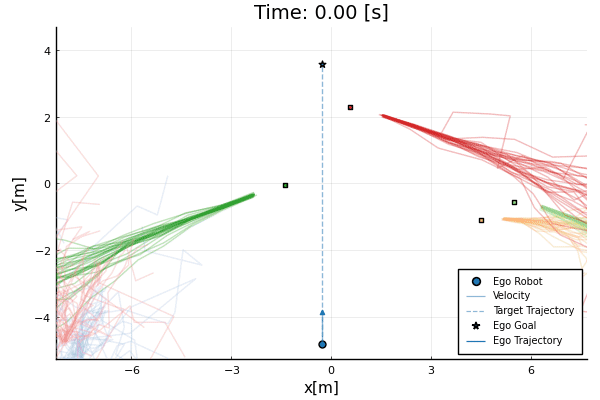

In [11]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="2_1_data_trajectron.gif")

In [ ]:
save("2_1_data_trajectron.jld2", "result", result)

# 2. Risk Sensitive

In [ ]:
include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");

σ_risk = 1.0;
prediction_rng_seed = 1;

include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [ ]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

In [ ]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false);

In [ ]:
display_log(result.log)

In [ ]:
result.total_cnt_cost

In [ ]:
result.total_pos_cost

In [ ]:
result.total_col_cost

In [ ]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

In [ ]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

In [ ]:
make_gif(result, dtplot=0.1, fps=5,xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -2.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="2_2_data_trajectron_risk_1.0.gif")

In [ ]:
# save("2_2_data_trajectron_risk_1.0.jld2", "result", result)

# 3. Deterministic (mode-mode) Prediction

In [ ]:
include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");

deterministic = true;
num_samples = 1;

include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [ ]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 ego_pos_init_vec=ego_pos_init_vec,
                 ego_pos_goal_vec=ego_pos_goal_vec,
                 target_speed=target_speed,
                 sim_horizon=sim_horizon,
                 verbose=true);

In [ ]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, ego_pos_goal_vec,
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false);

In [ ]:
display_log(result.log)

In [ ]:
result.total_cnt_cost

In [ ]:
result.total_pos_cost

In [ ]:
result.total_col_cost

In [ ]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

In [ ]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

In [ ]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="2_3_data_trajectron_deterministic.gif")

In [ ]:
save("2_3_data_trajectron_deterministic.jld2", "result", result)

# 4. Robot-Future-Conditional: PEDESTRIAN/236 Replaced with Ego

In [ ]:
using LinearAlgebra

include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");

incl_robot_node = true;
use_robot_future = true;

include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [ ]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 sim_horizon=sim_horizon,
                 ado_id_to_replace="PEDESTRIAN/236",
                 verbose=true);

In [ ]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, maximum(target_trajectory)[2],
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false,
                  ado_id_removed="PEDESTRIAN/236");

In [ ]:
result.total_cnt_cost

In [ ]:
result.total_pos_cost

In [ ]:
result.total_col_cost

In [ ]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

In [ ]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

In [ ]:
make_gif(result, dtplot=0.02, fps=50, xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="2_4_data_trajectron_future_conditional.gif",
         show_nominal_trajectory=true)

In [ ]:
save("2_4_data_trajectron_future_conditional.jld2", "result", result)

# 5. No Robot-Future-Conditional: PEDESTRIAN/236 Replaced with Ego

In [ ]:
include("$(@__DIR__)/../scripts/default_params/params_data_trajectron.jl");


include("$(@__DIR__)/../scripts/parameter_setup.jl");

In [ ]:
scene_loader, controller, w_init, measurement_schedule, target_trajectory, target_speed =
controller_setup(scene_param,
                 predictor_param,
                 prediction_device=prediction_device,
                 cost_param=cost_param,
                 cnt_param=cnt_param,
                 dtc=dtc,
                 sim_horizon=sim_horizon,
                 ado_id_to_replace="PEDESTRIAN/236",
                 verbose=true);

In [ ]:
result, ~, ~ = evaluate(scene_loader, controller, w_init, maximum(target_trajectory)[2],
                  target_speed, measurement_schedule, target_trajectory,
                  pos_error_replan, nominal_control=false,
                  ado_id_removed="PEDESTRIAN/236");

In [ ]:
display_log(result.log)

In [ ]:
result.total_cnt_cost

In [ ]:
result.total_pos_cost

In [ ]:
result.total_col_cost

In [ ]:
result.total_cnt_cost + result.total_pos_cost + result.total_col_cost

In [ ]:
minimum([minimum(vcat([norm(get_position(w.e_state) - ap) for ap in values(w.ap_dict)], Inf))
                          for w in result.w_history])

In [ ]:
make_gif(result, dtplot=0.02, fps=50,  xlim=(-3. + -5.263534, 13. + -5.314636), 
         ylim=(0. + -5.263534, 10. + -5.314636), figsize=(600, 400), 
         legendfontsize=7, legend=:bottomright, markersize=5., filename="2_5_data_trajectron_no_future_conditional.gif")

In [ ]:
save("2_5_data_trajectron_future_conditional.jld2", "result", result)